In [ ]:
## Data Description

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
df = pd.read_csv("dataset.csv", sep=',')

In [ ]:
# function to calculate the mean price for a broad category and plot it
def mean_price(df):
    df_copy = df.dropna(subset=['price']).copy()

    def extract_broad_category(category):
        if pd.notna(category):
            return category.split('.')[0]
        else:
            return 'Other'

    df_copy['broad_category'] = df_copy['category_code'].apply(extract_broad_category)

    grouped_data = df_copy.groupby('broad_category')['price'].mean()
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='bar')
    plt.title('Mean Price')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# function to visualize the amount of sales of the top 5 brands
def brand_volume(df):
    brand_volume = df['brand'].value_counts().head(5)
    brand_volume.plot(kind='bar')
    plt.title('Volume By Brand')
    plt.xlabel('Brand')
    plt.ylabel('Sold Items')
    plt.tight_layout()

    for i, count in enumerate(brand_volume):
        plt.annotate(f'{int(count)}', xy=(i, count), ha='center')

    plt.show()

# function to determine the category with the highest average price
def highest_price(df):
    df = df.dropna(subset=['price'])
    avg_price = df.groupby('category_code')['price'].mean()
    return avg_price.idxmax()

# function to determine the brand and category with the most sales of a price of under 20 currency units
def most_sales(df):
    df = df.loc[df['price'] < 20]
    brand = df['brand'].value_counts().idxmax()
    category = df['category_code'].value_counts().idxmax()
    return brand, category

# function to calculate the total cost of sales volume of category X in year Y
def volume_in_year(df, category, year):
    df['event_year'] = pd.to_datetime(df['event_time']).dt.year
    year = int(year)
    if (category in df['category_code'].values) and (year in df['event_year'].values):
        price = (df[(df['category_code'] == category) & (df['event_year'] == year)])['price'].sum()
        print(f'The cost of sales volume in the year {year} for {category} is {price} currency units')
    else:
        print(f'The year {year} or {category} does not exist')

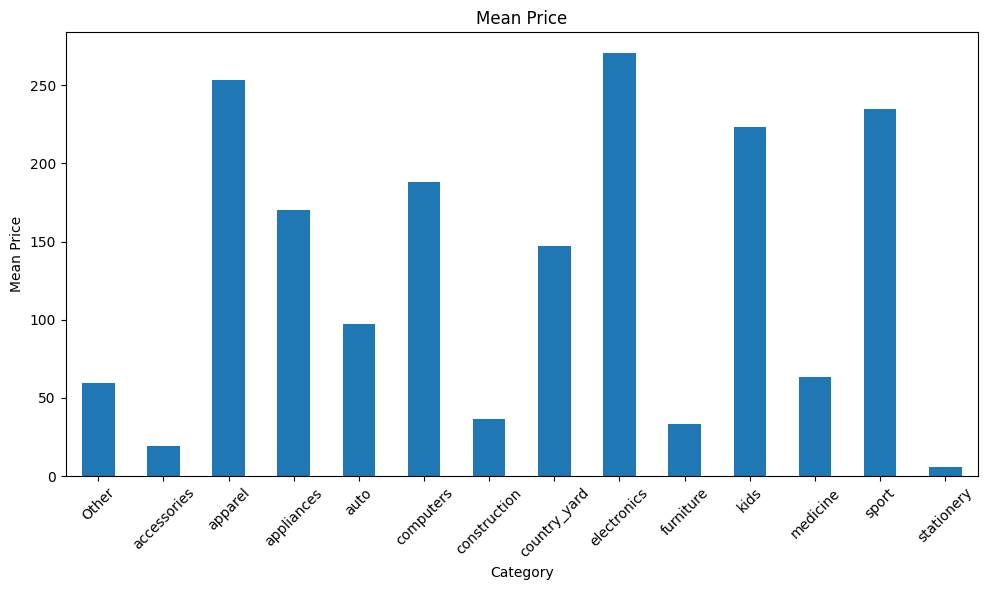

In [ ]:
mean_price(df)

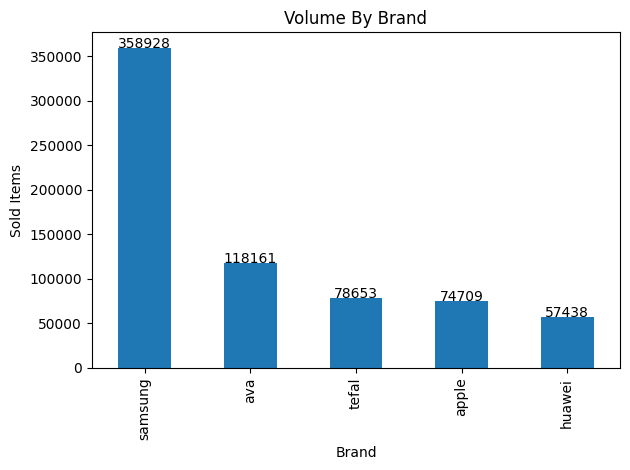

In [ ]:
brand_volume(df)

In [ ]:
highest_price(df)

'electronics.camera.video'

In [ ]:
most_sales(df)

('ava', 'computers.peripherals.mouse')

In [ ]:
volume_in_year(df, 'electronics.audio.headphone', 2020)

The cost of sales volume in the year 2020 for electronics.audio.headphone is 4274890.36 currency units
